# Part 1 - Data Understanding and Exploration

In [1]:
#1.a Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

import pandas as pd

TelmCst1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

In [2]:
#1.b Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

TelmCst2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [3]:
#1.c Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

merged_TelmCst = pd.merge(TelmCst1, TelmCst2, on='customerID')

In [4]:
#1.d Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

columns_incorporation = len(TelmCst1.columns) + len(TelmCst2.columns)- 1  # Subtract 1 as 'Customer ID' is Merged

if merged_TelmCst.shape[1] == columns_incorporation:
    print("All columns are successfully incorporated, and 'Customer ID' is correctly clubbed.")
    print("Number of columns in merged DataFrame:", merged_TelmCst.shape[1])
    print("Expected number of columns:", columns_incorporation)
else:
    print("Some columns might be missing, or 'Customer ID' is not correctly clubbed.")
    print("Number of columns in merged DataFrame:", merged_TelmCst.shape[1])
    print("Expected number of columns:", columns_incorporation)


All columns are successfully incorporated, and 'Customer ID' is correctly clubbed.
Number of columns in merged DataFrame: 21
Expected number of columns: 21


# Part 2 - Data Cleaning & Analysis

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Unique values for 'customerID':
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Unique values for 'gender':
Male      3555
Female    3488
Name: gender, dtype: int64
Unique values for 'Partner':
No     3641
Yes    3402
Name: Partner, dtype: int64
Unique values for 'Dependents':
No     4933
Yes    2110
Name: Dependents, dtype: int64
Uni

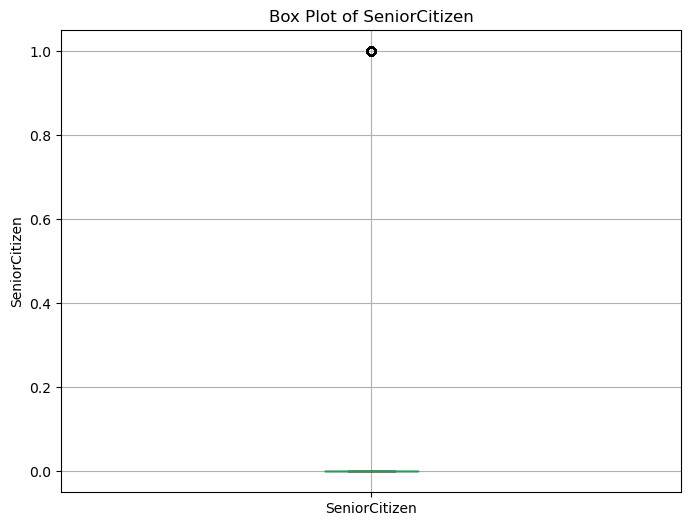

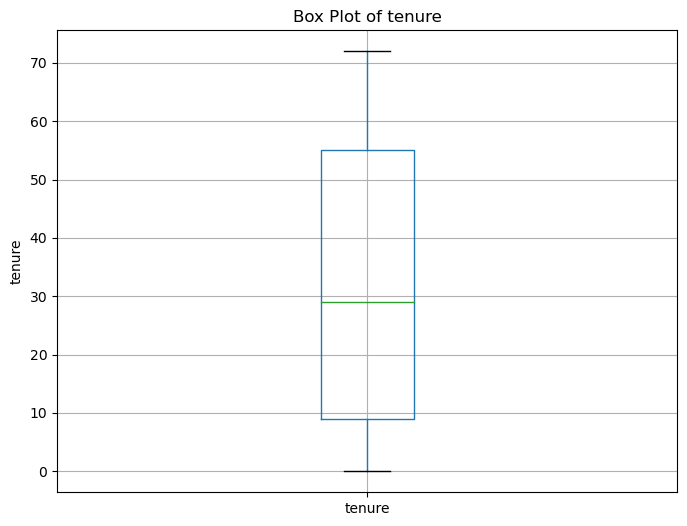

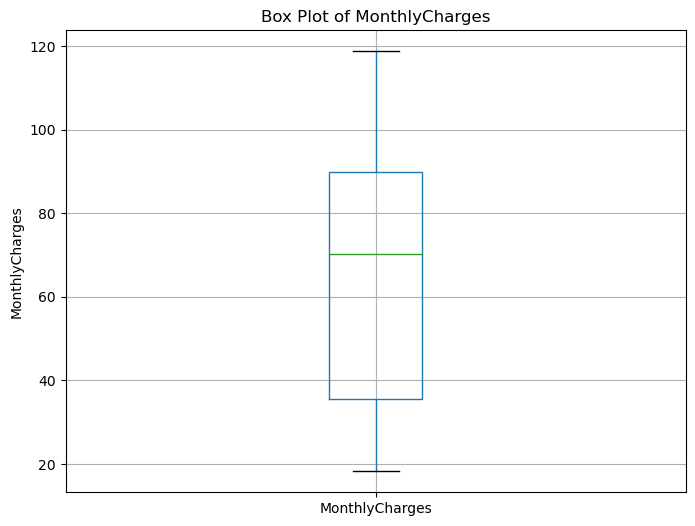

In [5]:
#2.a Impute missing/unexpected values in the DataFrame
#No missing, unexpected and outlier values found

import matplotlib.pyplot as plt

# Display the count of missing values in each column
missing_values_count = merged_TelmCst.isnull().sum()
print("Missing Values:")
print(missing_values_count)

# Display unique values and their counts for each categorical column
categorical_cols = merged_TelmCst.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_values = merged_TelmCst[col].value_counts()
    print(f"Unique values for '{col}':")
    print(unique_values)

# Display summary statistics for numerical columns
numerical_cols = merged_TelmCst.select_dtypes(include=['int64', 'float64']).columns
numerical_summary = merged_TelmCst[numerical_cols].describe()
print("Numerical Column Summary:")
print(numerical_summary)

# Visualize the distribution of numerical columns using box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    merged_TelmCst.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()


In [6]:
#2. b Make sure all the variables with continuous values are of ‘Float’ type

# Identify numerical columns
numerical_cols = merged_TelmCst.select_dtypes(include=['int64', 'float64']).columns

# Convert "total charges" column to float type if present
if 'total charges' in merged_TelmCst.columns:
    merged_TelmCst['total charges'] = merged_TelmCst['total charges'].astype(float)
    print("Column 'total charges' converted to float type.")
else:
    print("Column 'total charges' not found in the DataFrame.")

# Check and print the data types of numerical columns
for col in numerical_cols:
    if merged_TelmCst[col].dtype != 'float64':
        print(f"Converting column '{col}' to float type.")
    else:
        print(f"Column '{col}' is already of float type.")


Column 'total charges' not found in the DataFrame.
Converting column 'SeniorCitizen' to float type.
Converting column 'tenure' to float type.
Column 'MonthlyCharges' is already of float type.


In [7]:
column_data_types = merged_TelmCst.dtypes
print(column_data_types)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
import pandas as pd

def display_categorical_unique_values(dataframe):
    categorical_cols = dataframe.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        unique_values = dataframe[col].unique()
        print(f"Unique values for '{col}':")
        for value in unique_values:
            print(value)

display_categorical_unique_values(merged_TelmCst)

Unique values for 'customerID':
7590-VHVEG
5575-GNVDE
3668-QPYBK
7795-CFOCW
9237-HQITU
9305-CDSKC
1452-KIOVK
6713-OKOMC
7892-POOKP
6388-TABGU
9763-GRSKD
7469-LKBCI
8091-TTVAX
0280-XJGEX
5129-JLPIS
3655-SNQYZ
8191-XWSZG
9959-WOFKT
4190-MFLUW
4183-MYFRB
8779-QRDMV
1680-VDCWW
1066-JKSGK
3638-WEABW
6322-HRPFA
6865-JZNKO
6467-CHFZW
8665-UTDHZ
5248-YGIJN
8773-HHUOZ
3841-NFECX
4929-XIHVW
6827-IEAUQ
7310-EGVHZ
3413-BMNZE
6234-RAAPL
6047-YHPVI
6572-ADKRS
5380-WJKOV
8168-UQWWF
8865-TNMNX
9489-DEDVP
9867-JCZSP
4671-VJLCL
4080-IIARD
3714-NTNFO
5948-UJZLF
7760-OYPDY
7639-LIAYI
2954-PIBKO
8012-SOUDQ
9420-LOJKX
6575-SUVOI
7495-OOKFY
4667-QONEA
1658-BYGOY
8769-KKTPH
5067-XJQFU
3957-SQXML
5954-BDFSG
0434-CSFON
1215-FIGMP
0526-SXDJP
0557-ASKVU
5698-BQJOH
5122-CYFXA
8627-ZYGSZ
3410-YOQBQ
3170-NMYVV
7410-OIEDU
2273-QCKXA
0731-EBJQB
1891-QRQSA
8028-PNXHQ
5630-AHZIL
2673-CXQEU
6416-JNVRK
5590-ZSKRV
0191-ZHSKZ
3887-PBQAO
5919-TMRGD
8108-UXRQN
9191-MYQKX
9919-YLNNG
0318-ZOPWS
4445-ZJNMU
4808-YNLEU
1862-QRWPE


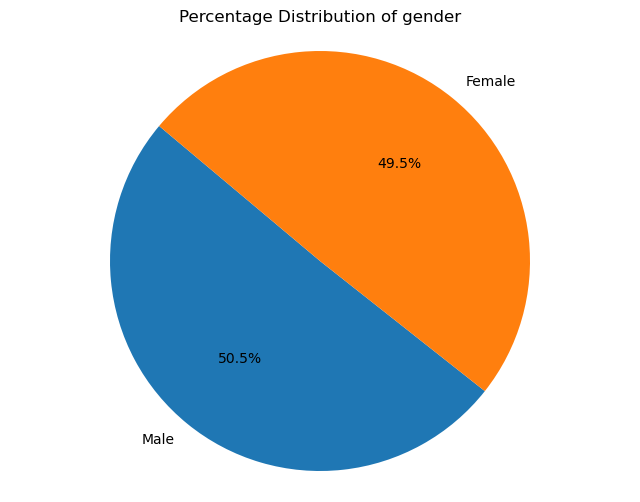

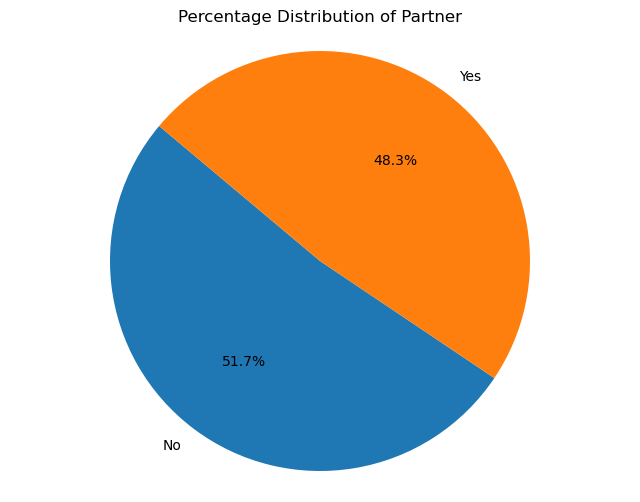

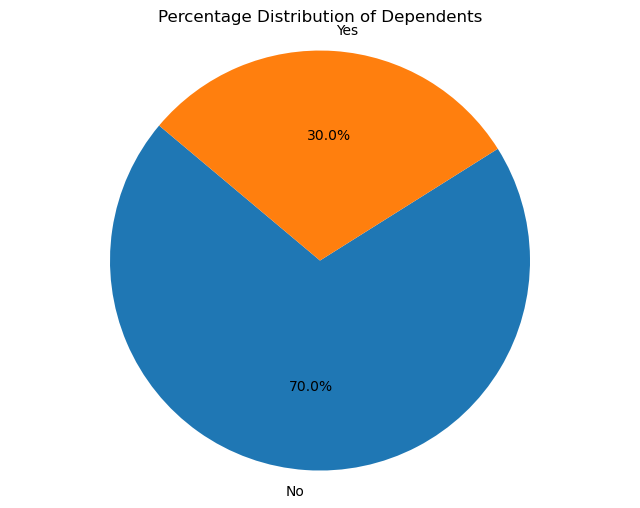

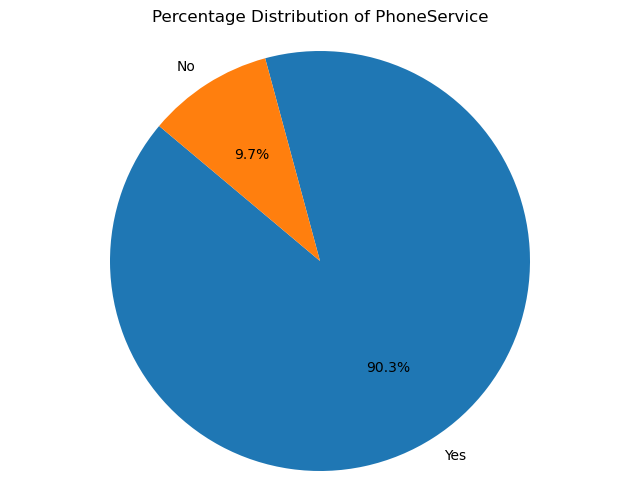

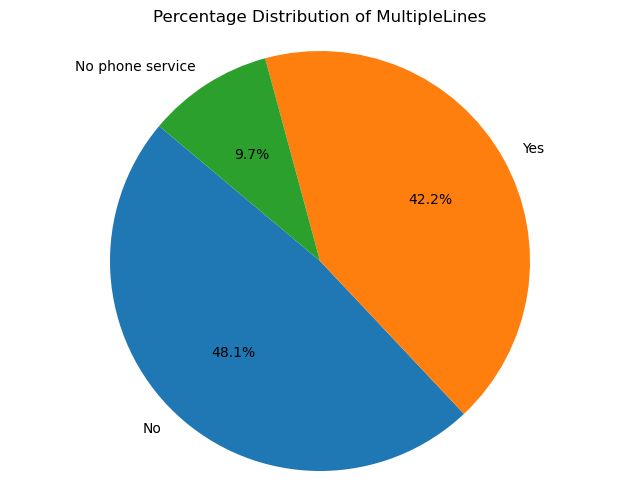

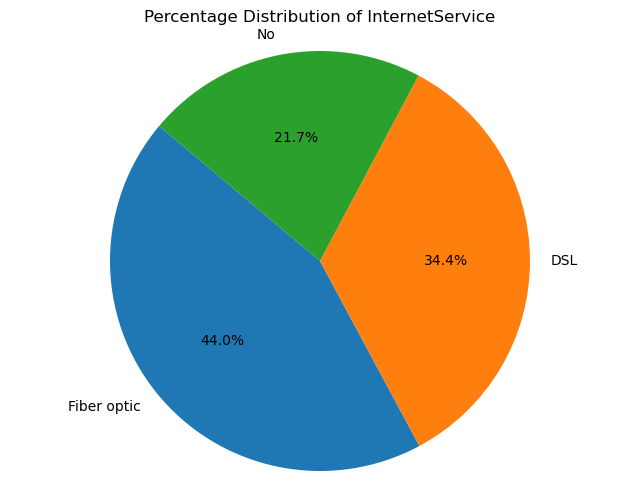

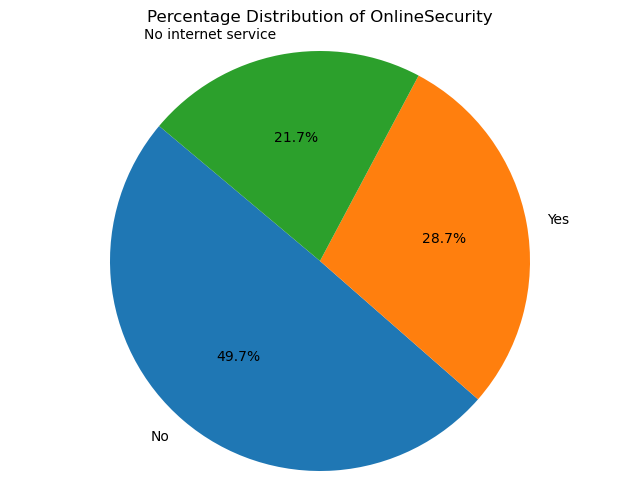

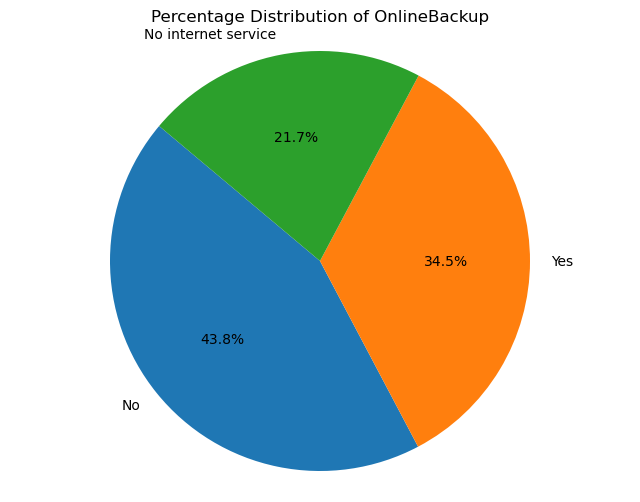

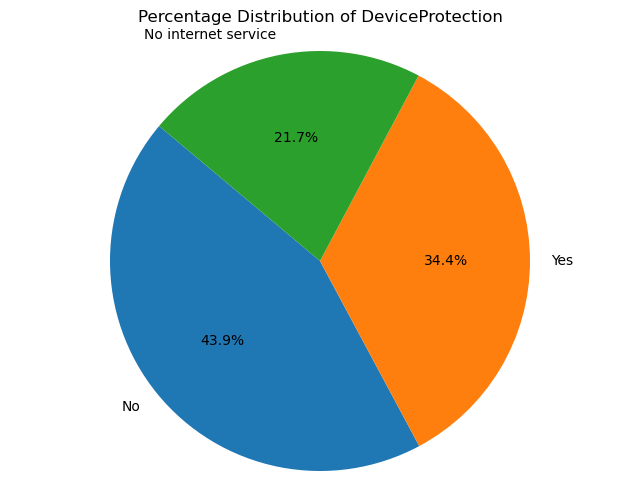

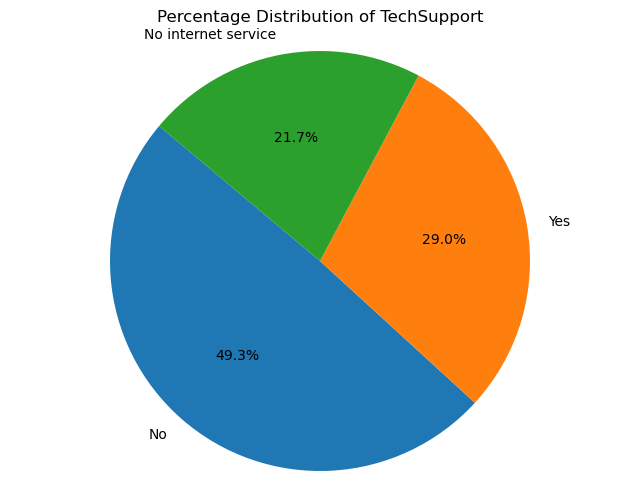

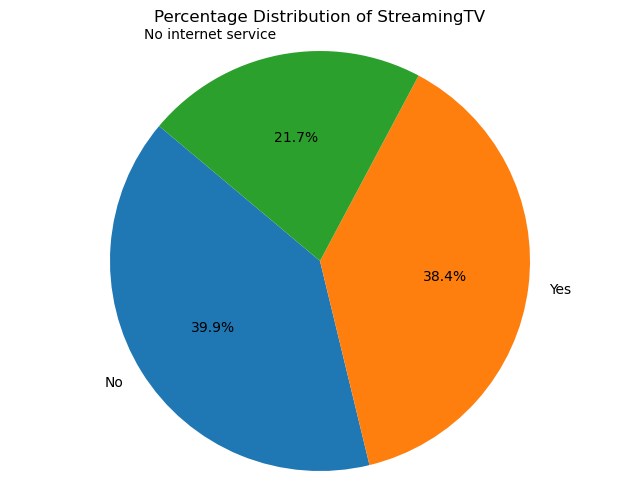

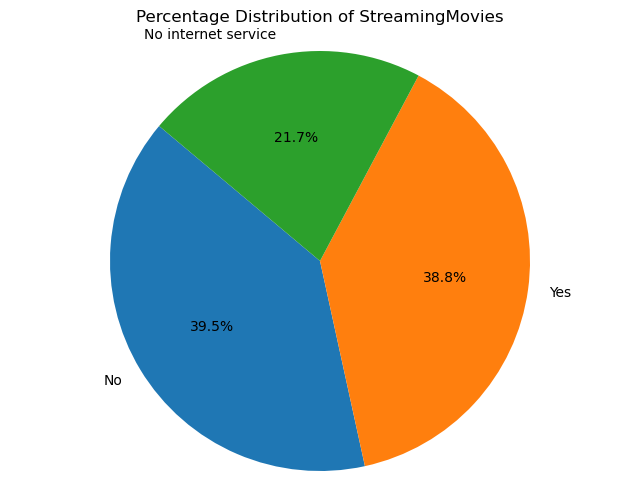

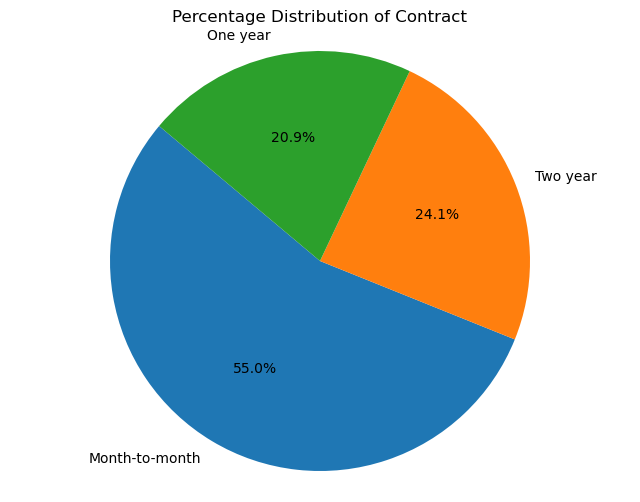

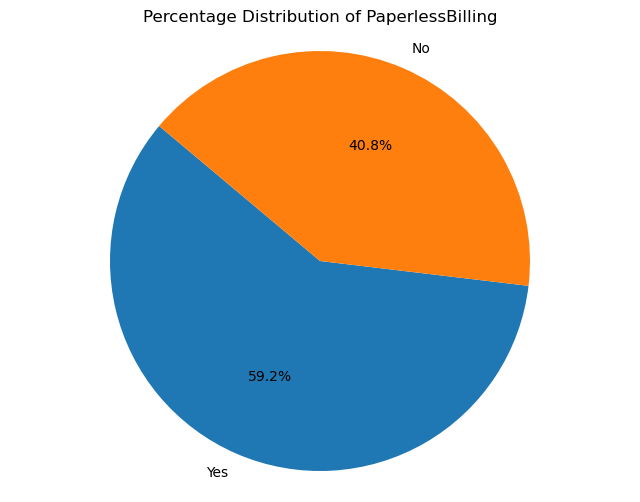

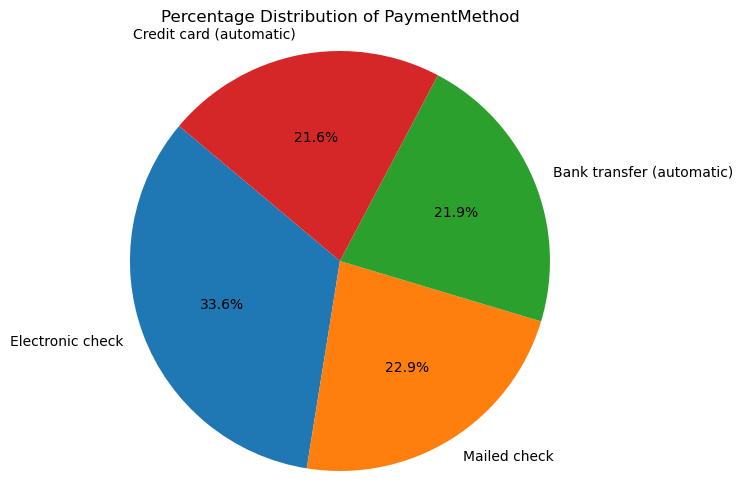

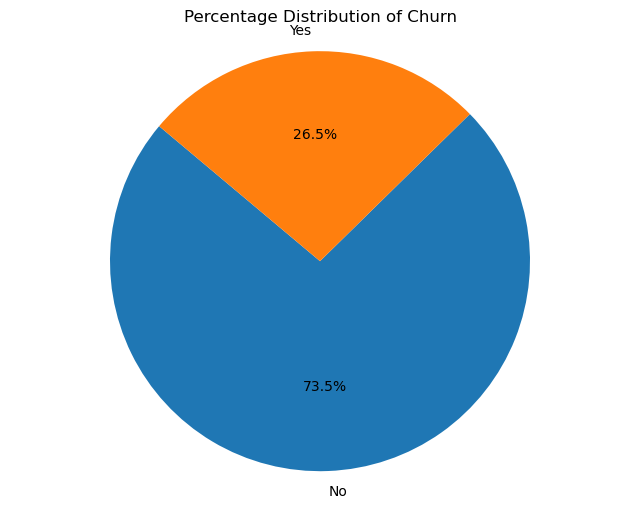

In [9]:
#2. c Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart

import matplotlib.pyplot as plt

def plot_categorical_pie_charts(dataframe, categorical_features):
    for col in categorical_features:
        if col in dataframe.columns:
            plt.figure(figsize=(8, 6))
            value_counts = dataframe[col].value_counts()
            labels = value_counts.index
            sizes = value_counts.values
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
            plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            plt.title(f'Percentage Distribution of {col}')
            plt.show()
        else:
            print(f"Column '{col}' not found in the DataFrame.")

categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod', 'Churn']

plot_categorical_pie_charts(merged_TelmCst, categorical_features)

In [10]:
#2. e Encode all the appropriate Categorical features with the best suitable approach

# Features and their mapping for binary encoding
binary_encoding_mapping = {
    'gender': {'Male': 1, 'Female': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0},
    'Churn': {'Yes': 1, 'No': 0}
}

# Features for multi-category encoding
multi_category_encoding_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                    'StreamingTV', 'DeviceProtection', 'TechSupport', 'StreamingMovies',
                                    'Contract', 'PaymentMethod']

# Apply Binary Encoding
for col, mapping in binary_encoding_mapping.items():
    if col in merged_TelmCst.columns:
        merged_TelmCst[col] = merged_TelmCst[col].map(mapping)

# Apply One-Hot Encoding for multi-category features
merged_TelmCst = pd.get_dummies(merged_TelmCst, columns=multi_category_encoding_features, drop_first=True)

# Display the modified DataFrame
print(merged_TelmCst.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges TotalCharges  ...  \
0             0                 1           29.85        29.85  ...   
1             1                 0           56.95       1889.5  ...   
2             1                 1           53.85       108.15  ...   
3             0                 0           42.30      1840.75  ...   
4             1                 1           70.70       151.65  ...   

   DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  \
0                     0                                0                0   
1   

In [25]:
#2.f Split the data into 80% train and 20% test

from sklearn.model_selection import train_test_split

# Drop 'Churn' and 'customerID' columns from features while retaining 'customerID'
X = merged_TelmCst.drop(["Churn", "customerID"], axis=1)

# Create a copy of the 'customerID' column for later reference
customerID_column = merged_TelmCst['customerID'].copy()

# Separate the target variable
y = merged_TelmCst['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test, customerID_train, customerID_test = train_test_split(
    X, y, customerID_column, test_size=0.2, random_state=1)


In [26]:
#2. g Normalize/Standardize the data with the best suitable approach

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Convert 'TotalCharges' column to numeric, coercing non-numeric values to NaN
merged_TelmCst['TotalCharges'] = pd.to_numeric(merged_TelmCst['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges' column
merged_TelmCst.dropna(subset=['TotalCharges'], inplace=True)

# Initialize the StandardScaler
scaler = StandardScaler()

# List of numerical columns that need to be standardized
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit the scaler on the data and transform the numerical columns
merged_TelmCst[numerical_columns] = scaler.fit_transform(merged_TelmCst[numerical_columns])



# Model building and performance improvement

In [27]:
#3. a Train a model using Decision tree and check the performance of the model on train and test data

from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))


0.9976888888888888
0.7213930348258707


In [29]:
#3. b Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their potential values for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dTree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best score
print("Train Score:", grid_search.best_score_)

# Evaluate the model on the test data using the best parameters
best_dTree = grid_search.best_estimator_
test_score = best_dTree.score(X_test, y_test)
print("Test Score", test_score)


Train Score: 0.7717333333333333
Test Score 0.7889125799573561


In [31]:
#3. c Train a model using Random forest and check the performance of the model on train and test data

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

print("Random Forest Train Score:", train_score)
print("Random Forest Test Score:", test_score)

Random Forest Train Score: 0.9976888888888888
Random Forest Test Score: 0.7896233120113717


In [32]:
#3. d Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d 

# Define hyperparameters and their potential values for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Print the best score
print("Random Forest Train Score:", grid_search_rf.best_score_)

# Evaluate the model on the test data using the best parameters
best_rf_model = grid_search_rf.best_estimator_
test_score_rf = best_rf_model.score(X_test, y_test)
print("Random Forest Test Score:", test_score_rf)


Random Forest Train Score: 0.8062222222222222
Random Forest Test Score: 0.8031272210376688


In [33]:
#3. e Train a model using Adaboost and check the performance of the model on train and test data 

from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(random_state=1)
adaboost_model.fit(X_train, y_train)
train_score_adaboost = adaboost_model.score(X_train, y_train)
test_score_adaboost = adaboost_model.score(X_test, y_test)

print("Adaboost Train Score:", train_score_adaboost)
print("Adaboost Test Score:", test_score_adaboost)


Adaboost Train Score: 0.8097777777777778
Adaboost Test Score: 0.8024164889836531


In [34]:
#3. f Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f

# Define hyperparameters and their potential values for grid search
param_grid_adaboost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create GridSearchCV with cross-validation
grid_search_adaboost = GridSearchCV(estimator=adaboost_model, param_grid=param_grid_adaboost, cv=5)
grid_search_adaboost.fit(X_train, y_train)

# Get the best parameters
best_params_adaboost = grid_search_adaboost.best_params_

# Print the best score
print("Adaboost Train Score:", grid_search_adaboost.best_score_)

# Evaluate the model on the test data using the best parameters
best_adaboost_model = grid_search_adaboost.best_estimator_
test_score_adaboost = best_adaboost_model.score(X_test, y_test)
print("Adaboost Test Score:", test_score_adaboost)


Adaboost Train Score: 0.8051555555555556
Adaboost Test Score: 0.8017057569296375


In [35]:
#3. g Train a model using GradientBoost and check the performance of the model on train and test data 

from sklearn.ensemble import GradientBoostingClassifier

gradientboost_model = GradientBoostingClassifier(random_state=1)
gradientboost_model.fit(X_train, y_train)
train_score_gradientboost = gradientboost_model.score(X_train, y_train)
test_score_gradientboost = gradientboost_model.score(X_test, y_test)

print("Gradient Boosting Train Score:", train_score_gradientboost)
print("Gradient Boosting Test Score:", test_score_gradientboost)


Gradient Boosting Train Score: 0.8291555555555555
Gradient Boosting Test Score: 0.7931769722814499


In [36]:
#3. h Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h

# Define hyperparameters and their potential values for grid search
param_grid_gradientboost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create GridSearchCV with cross-validation
grid_search_gradientboost = GridSearchCV(estimator=gradientboost_model, param_grid=param_grid_gradientboost, cv=5)
grid_search_gradientboost.fit(X_train, y_train)

# Get the best parameters
best_params_gradientboost = grid_search_gradientboost.best_params_

# Print the best score
print("Gradient Boosting Train Score:", grid_search_gradientboost.best_score_)

# Evaluate the model on the test data using the best parameters
best_gradientboost_model = grid_search_gradientboost.best_estimator_
test_score_gradientboost = best_gradientboost_model.score(X_test, y_test)
print("Gradient Boosting Test Score:", test_score_gradientboost)


Gradient Boosting Train Score: 0.8039111111111111
Gradient Boosting Test Score: 0.7931769722814499


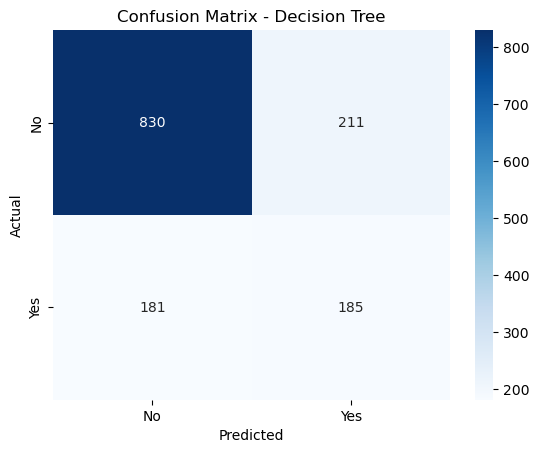

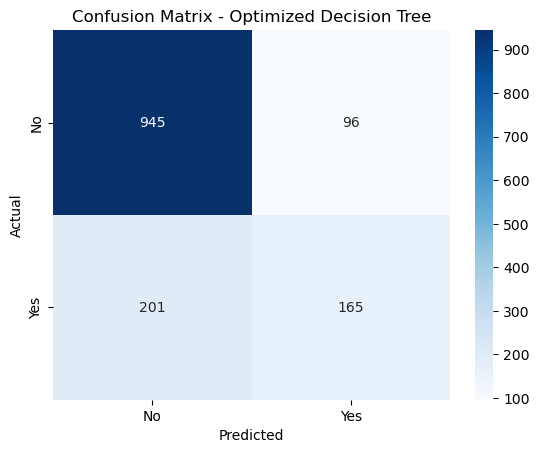

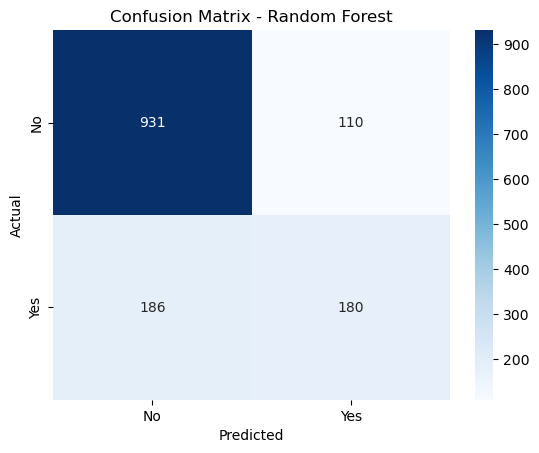

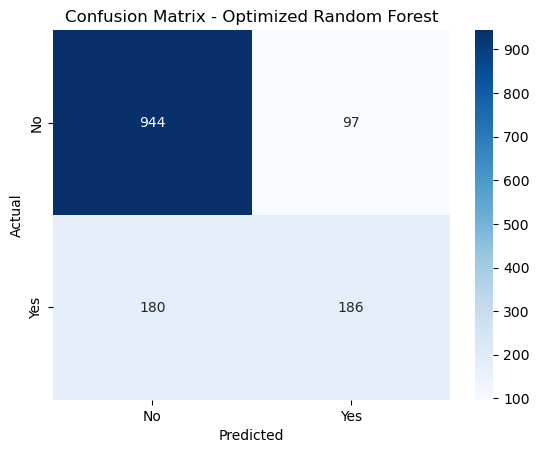

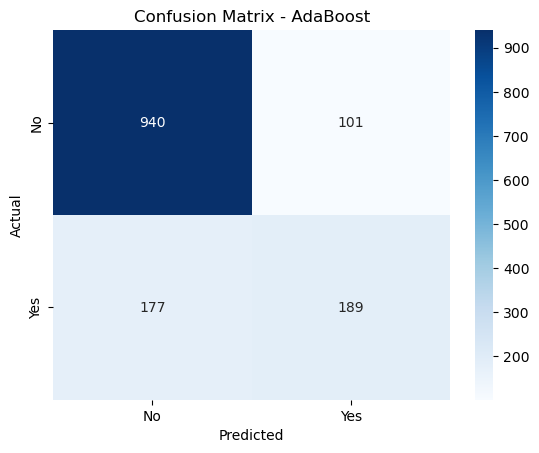

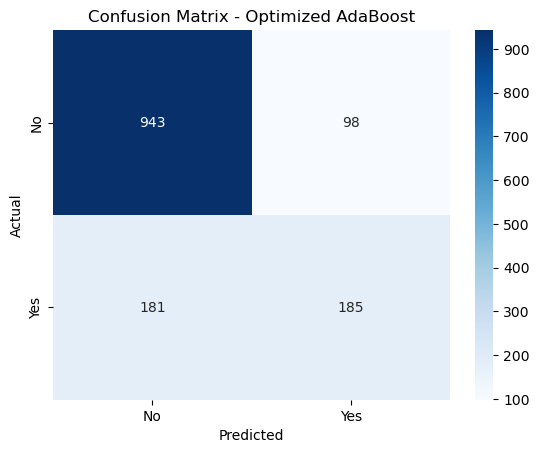

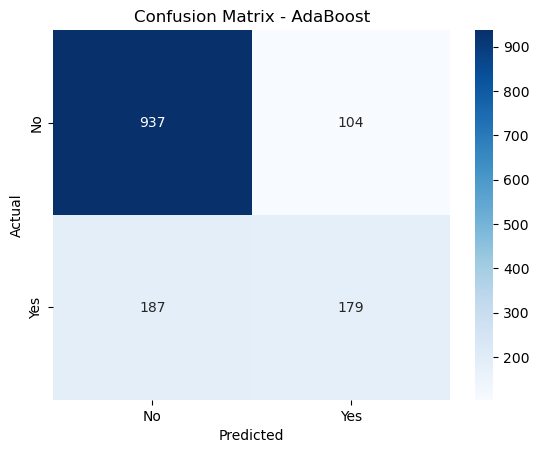

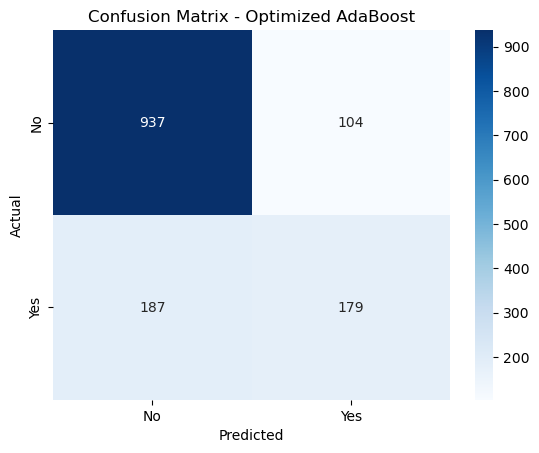

In [39]:
#Bonus: Confusion Matrix of each model to visualize True Positives & Negatives and False Positives & Negatives 
#The Confusion Matrix is also to support my detailed analysis in 3. i

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = dTree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_pred = best_dTree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Optimized Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_pred = best_rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Optimized Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_pred = adaboost_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_pred = best_adaboost_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Optimized AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_pred = gradientboost_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - GradientBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_pred = best_gradientboost_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Optimized GradientBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
